### Clasiffication Pneumonia vs Normal with ChestX-ray (cell 2018)-Vgg16

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip3 uninstall torch torchvision

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
PATH = "/home/nbuser/chest_xray/"
sz=224

In [5]:
os.listdir(PATH)

['test',
 'valid',
 'Dense121-ROC.ipynb',
 'models',
 'Vgg16-ROC.ipynb',
 '.ipynb_checkpoints',
 'train',
 'keras-vgg16.ipynb',
 'tmp',
 'ResNet34-ROC.ipynb']

In [6]:
os.listdir(f'{PATH}valid')

['PNEUMONIA', 'NORMAL']

In [7]:
files = os.listdir(f'{PATH}valid/NORMAL')[:5]
files

['NORMAL2-IM-0300-0001.jpeg',
 'NORMAL2-IM-0102-0001.jpeg',
 'NORMAL2-IM-0201-0001.jpeg',
 'NORMAL2-IM-0120-0001.jpeg',
 'NORMAL2-IM-0199-0001.jpeg']

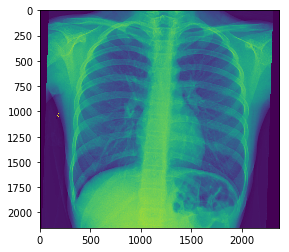

In [8]:
img = plt.imread(f'{PATH}valid/NORMAL/{files[1]}')
plt.imshow(img);

In [9]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [10]:
arch=vgg16
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

  0%|          | 0/82 [00:00<?, ?it/s]

/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|██████████| 10/10 [00:17<00:00,  1.78s/it]


epoch      trn_loss   val_loss   accuracy                  
    0      0.194486   0.563926   0.778846  
    1      0.131981   0.566862   0.815705                  



[0.5668621146335051, 0.8157051297334524]

In [11]:
data.classes

['NORMAL', 'PNEUMONIA']

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [13]:
lrf=learn.lr_find()

 83%|████████▎ | 68/82 [00:01<00:00, 42.48it/s, loss=2.51] 


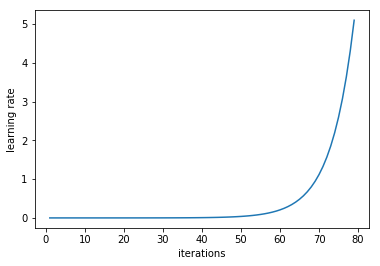

In [14]:
learn.sched.plot_lr()

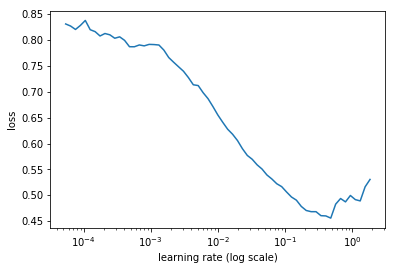

In [15]:
learn.sched.plot()

In [16]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [17]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [18]:
ims = np.stack([get_augs() for i in range(6)])

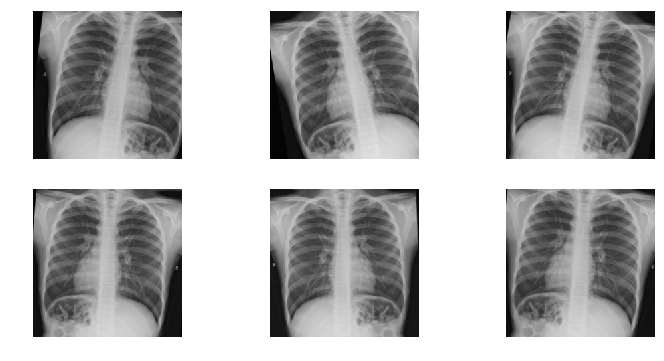

In [19]:
plots(ims, rows=2)

In [20]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/nbuser/.local/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [21]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.200599   0.485387   0.8125    



[0.4853871965255493, 0.8125000015283242]

In [22]:
learn.precompute=False

In [23]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.16866    0.41427    0.846154  
    1      0.147282   0.382855   0.862179                  
    2      0.136742   0.366871   0.86859                   



[0.3668712885716023, 0.8685897451180679]

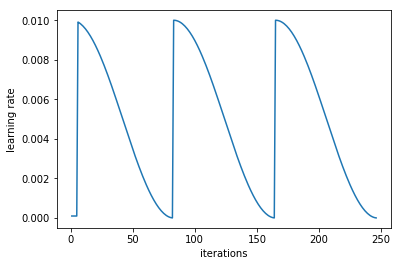

In [24]:
learn.sched.plot_lr()

In [25]:
learn.unfreeze()

In [26]:
lr=np.array([1e-4,1e-3,1e-2])

In [28]:
learn.fit(lr, 1, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.095619   0.339445   0.883013  


[0.3394447018702825, 0.8830128189844962]

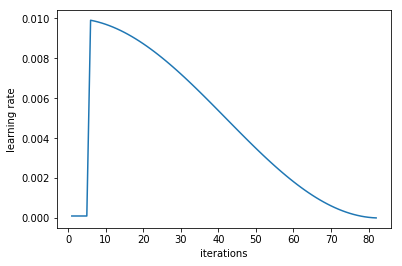

In [29]:
learn.sched.plot_lr()

In [30]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [31]:
accuracy_np(probs, y)

0.8477564102564102

In [32]:
probs[-10:]

array([[0.00158, 0.99842],
       [0.00359, 0.99641],
       [0.00304, 0.99696],
       [0.00157, 0.99843],
       [0.00081, 0.99919],
       [0.00474, 0.99526],
       [0.0036 , 0.9964 ],
       [0.96828, 0.03172],
       [0.00902, 0.99098],
       [0.0019 , 0.9981 ]], dtype=float32)

### Confusion Matrix

In [33]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[141  93]
 [  2 388]]


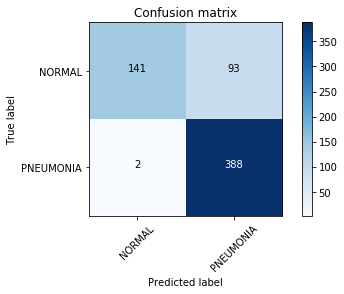

In [35]:
plot_confusion_matrix(cm, data.classes)

### ROC Curve

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, probs)

In [37]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print(auc)

0.9640806486960334


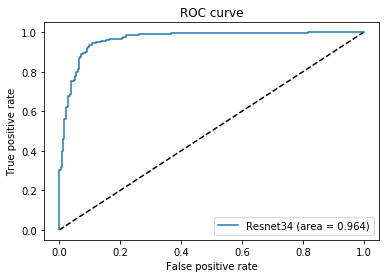

In [38]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Resnet34 (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [39]:
print(fpr)

[0.      0.      0.00427 0.00427 0.00855 0.00855 0.01282 0.01282 0.01709 0.01709 0.02137 0.02137 0.02564
 0.02564 0.02991 0.02991 0.03419 0.03419 0.03846 0.03846 0.04701 0.04701 0.05128 0.05128 0.05556 0.05556
 0.05983 0.05983 0.0641  0.0641  0.06838 0.06838 0.07265 0.07265 0.07692 0.07692 0.0812  0.0812  0.08547
 0.08547 0.08974 0.08974 0.09402 0.09402 0.09829 0.09829 0.10684 0.10684 0.11111 0.11111 0.11966 0.11966
 0.13675 0.13675 0.15385 0.15385 0.16239 0.16239 0.17094 0.17094 0.20513 0.20513 0.2094  0.2094  0.21795
 0.21795 0.24786 0.24786 0.26068 0.26068 0.35043 0.35043 0.36752 0.36752 0.47009 0.47009 0.81624 0.81624
 1.     ]


In [40]:
print(tpr)

[0.00256 0.30256 0.30256 0.31795 0.31795 0.4     0.4     0.45897 0.45897 0.55897 0.55897 0.62051 0.62051
 0.62308 0.62308 0.67949 0.67949 0.68974 0.68974 0.75128 0.75128 0.75641 0.75641 0.77949 0.77949 0.8
 0.8     0.81538 0.81538 0.87179 0.87179 0.87436 0.87436 0.88974 0.88974 0.89487 0.89487 0.89744 0.89744
 0.90256 0.90256 0.91795 0.91795 0.92564 0.92564 0.9359  0.9359  0.94359 0.94359 0.94615 0.94615 0.94872
 0.94872 0.95641 0.95641 0.96154 0.96154 0.9641  0.9641  0.96667 0.96667 0.97179 0.97179 0.97692 0.97692
 0.98462 0.98462 0.98718 0.98718 0.98974 0.98974 0.99231 0.99231 0.99487 0.99487 0.99744 0.99744 1.
 1.     ]


In [41]:
probs[:5]

array([0.06172, 0.64643, 0.99742, 0.46354, 0.95948], dtype=float32)

### Performance Matrix

In [42]:
predict1 = []
for i in range(len(probs)):
    if probs[i] > 0.5:
        predict1.append(1)
    else:
        predict1.append(0)

In [43]:
len(predict1)

624

In [44]:
y_pred = np.array(predict1)

In [45]:
print(sklearn.metrics.classification_report(y_pred, y))

             precision    recall  f1-score   support

          0       0.60      0.99      0.75       143
          1       0.99      0.81      0.89       481

avg / total       0.90      0.85      0.86       624

